In [1]:
import pandas as pd
import plotly.express as px

In [2]:
def get_date(str):
    ans=""
    flag = 0
    for s in str:
        if s =='/':
            flag+=1
        if flag<2:
            ans+=s
        else:
            break
    return ans
def read_clean_data(file_path):
    data = pd.read_csv(file_path)
    year_columns = [col for col in data.columns if col.isdigit()]

    # Convert year columns to integers to find the range
    year_columns_int = [int(year) for year in year_columns]
    start = min(year_columns_int)
    end = max(year_columns_int)
    
    # Generate the list of timestamp columns
    timestamp_columns = ['Timestamp.{}'.format(year) for year in range(start, end + 1)]
    
    # Ensure that at least one timestamp column exists in the data
    if not any(col in data.columns for col in timestamp_columns):
        raise ValueError("No timestamp columns found in the data.")
    
    # Use the first available timestamp column to create the 'Date' column
#     for ts_col in timestamp_columns:
#         if ts_col in data.columns:
    data['Date'] = data['Timestamp.2024']
#             break
#     for idx in range(len(data['Date'])):
#         date = get_date(data['Date'][idx])
#         data['Date'][idx] = date
    # Drop the timestamp columns
    data = data.drop(columns=timestamp_columns)
    
    # Replace NA values with the values just above
    for idx in data.index:
        if idx == 0:
            # Skip the first row
            continue
        for col in data.columns:
            if pd.isna(data.at[idx, col]):
                above = data.at[idx - 1, col]
                data.at[idx, col] = above
    
    # Remove rows containing any remaining NA values (if any)
    cleaned_data = data.dropna()

    return cleaned_data


In [3]:
def plot_cleaned_data(cleaned_data):
    # Assuming there is a 'Date' column in the data for plotting
    if 'Date' not in cleaned_data.columns:
        raise ValueError("The data must contain a 'Date' column for plotting.")
    
    # Convert 'Date' column to datetime format if it's not already
    cleaned_data['Date'] = cleaned_data['Date']
    
    # Melt the dataframe for better plotting with Plotly
    melted_data = cleaned_data.melt(id_vars='Date', var_name='Variable', value_name='Value')
    
    fig = px.line(melted_data, x='Date', y='Value', color='Variable', title='Cleaned Data Plot')
    fig.show()
    
def plot_seasonality(cleaned_data, output_dates):
    # Ensure the 'Date' column is in datetime format
    if 'Date' not in cleaned_data.columns:
        raise ValueError("The data must contain a 'Date' column for plotting.")
    
    cleaned_data['Date'] = cleaned_data['Date']
    
    # Melt the dataframe for better plotting with Plotly
    melted_data = cleaned_data.melt(id_vars='Date', var_name='Variable', value_name='Value')
    
    # Create the line plot
    fig = px.line(melted_data, x='Date', y='Value', color='Variable', title='Cleaned Data Plot')
    
    # Add markers for the output dates
    for date in output_dates:
        fig.add_vline(x=date, line=dict(color="yellow", width=2))
    
    fig.show()

In [6]:
# Load the CSV file
file_path = 'SG_KVH.csv'  # Update with the actual file path
# exclude_years = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2022']
exclude_years=[]
# exclude_years=['2010','2011']
# for last 5 years only
# exclude_years = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

# for only current year
# exclude_years = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']

df = read_clean_data(file_path)
df = df.drop(columns=exclude_years)

In [7]:
# file_path = 'transformed_data.csv'
# df = pd.read_csv(file_path)
# df = df.dropna()
plot_cleaned_data(df)

In [8]:
df.describe()

2026        2025        2024        2023        2022        2021  \
count  754.000000  754.000000  754.000000  754.000000  754.000000  754.000000   
mean     1.358422    1.767759    1.679721    1.828859    1.429668    1.306565   
std      0.075175    0.644024    0.616693    0.478566    0.610758    0.548882   
min      0.980000    0.910000    0.320000    0.520000    0.400000    0.350000   
25%      1.380000    1.410000    1.190000    1.530000    0.920000    0.860000   
50%      1.380000    1.410000    1.560000    1.810000    1.290000    1.250000   
75%      1.380000    1.880000    2.090000    2.100000    1.892500    1.507500   
max      1.570000    3.870000    3.240000    3.030000    3.100000    4.240000   

             2020        2019        2018        2017        2016        2015  \
count  754.000000  754.000000  754.000000  754.000000  754.000000  754.000000   
mean     0.894324    0.867653    1.068501    1.074483    1.019881    0.949934   
std      0.222654    0.310444    0.449630    0.358531    0.389027    0.504025   
min      0.320000    0.390000    0.300000    0.430000   -0.070000   -0.120000   
25%      0.730000    0.610000    0.820000    0.742500    0.700000    0.720000   
50%      0.920000    0.850000    0.980000    1.100000    1.000000    0.920000   
75%      1.030000    1.050000    1.257500    1.340000    1.270000    1.110000   
max      1.590000    1.850000    3.030000    2.020000    1.910000    2.820000   

             2014        2013        2012  
count  754.000000  754.000000  754.000000  
mean     0.649363    0.694854    1.487586  
std      0.442947    0.454206    1.055276  
min     -0.740000   -1.920000   -0.630000  
25%      0.310000    0.422500    0.680000  
50%      0.550000    0.620000    1.320000  
75%      1.000000    0.820000    2.227500  
max      1.880000    2.210000    4.340000

In [9]:
df.head()

2026  2025  2024  2023  2022  2021  2020  2019  2018  2017  2016  2015  \
10  1.20  1.32  1.34  1.47  0.71  0.65  0.45  0.69  0.68  0.43  0.25 -0.12   
11  1.20  1.32  1.41  1.47  0.72  0.65  0.45  0.69  0.72  0.47  0.28 -0.09   
12  1.20  1.32  1.67  1.37  0.70  0.67  0.45  0.69  0.72  0.46  0.44 -0.11   
13  1.17  1.32  1.67  1.30  0.70  0.67  0.64  0.77  0.72  0.58  0.26 -0.11   
14  1.12  1.62  1.67  1.30  0.70  0.67  0.34  0.60  0.87  0.58  0.51 -0.08   

    2014  2013  2012        Date  
10  0.72  0.71  0.12  2022-04-07  
11  0.72  0.42  0.08  2022-04-08  
12  0.72  0.42  0.15  2022-04-09  
13  0.68  0.42  0.15  2022-04-10  
14  0.65  0.57  0.15  2022-04-11

In [10]:
def below_value(df,value):
    # Select only the columns with year data
    year_columns = df.columns[:-1]  # Exclude the 'Date' column

    # Find rows where all year columns have values below zero
    condition = (df[year_columns] < value).all(axis=1)

    # Output the corresponding dates
    output_dates = df.loc[condition, 'Date']
    return output_dates

def above_value(df,value):
    # Select only the columns with year data
    year_columns = df.columns[:-1]  # Exclude the 'Date' column

    # Find rows where all year columns have values below zero
    condition = (df[year_columns]>value).all(axis=1)

    # Output the corresponding dates
    output_dates = df.loc[condition, 'Date']
    return output_dates

def range_value(df,low,high):
    # Select only the columns with year data
    year_columns = df.columns[:-1]  # Exclude the 'Date' column

    # Find rows where all year columns have values below zero
    condition = df[year_columns].apply(lambda row: row.between(low, high).all(), axis=1)
    # Output the corresponding dates
    output_dates = df.loc[condition, 'Date']
    return output_dates

In [11]:
output_dates = below_value(df,0)
plot_seasonality(df,output_dates)

In [14]:
output_dates = above_value(df,2)
plot_seasonality(df,output_dates)

In [16]:
output_dates = range_value(df,0,2)
plot_seasonality(df,output_dates)

In [17]:
def find_uptrend_dates_all_years(data, window_size=3):
    """
    Find uptrend dates in the data where the values are consistently increasing for all years.
    
    Parameters:
    data (pd.DataFrame): The data containing date and price columns.
    window_size (int): The minimum number of consecutive increasing values to consider as an uptrend.
    
    Returns:
    list: Dates corresponding to the uptrends.
    """
    uptrend_dates = []

   
    # Iterate through the data and check for uptrends
    for i in range(len(data) - window_size + 1):
        is_uptrend = True
        
        for j in range(window_size - 1):
            current_row = data.iloc[i + j]
            next_row = data.iloc[i + j + 1]

            if not all(next_row[year] > current_row[year] for year in data.columns[:-1]):
                is_uptrend = False
                break

        if is_uptrend:
            uptrend_dates.append(data['Date'].iloc[i])

    return uptrend_dates

def find_downtrend_dates_all_years(data, window_size=3):
    """
    Find downtrend dates in the data where the values are consistently decreasing for all years.
    
    Parameters:
    data (pd.DataFrame): The data containing date and price columns.
    window_size (int): The minimum number of consecutive decreasing values to consider as a downtrend.
    
    Returns:
    list: Dates corresponding to the downtrends.
    """
    downtrend_dates = []

    # Iterate through the data and check for downtrends
    for i in range(len(data) - window_size + 1):
        is_downtrend = True
        
        for j in range(window_size - 1):
            current_row = data.iloc[i + j]
            next_row = data.iloc[i + j + 1]

            if not all(next_row[year] < current_row[year] for year in data.columns[:-1]):
                is_downtrend = False
                break

        if is_downtrend:
            downtrend_dates.append(data['Date'].iloc[i])

    return downtrend_dates

In [18]:
uptrends_dates = find_uptrend_dates_all_years(df,3)
print(uptrends_dates)

[]


In [19]:
plot_seasonality(df,uptrends_dates)

In [20]:
downtrends_dates = find_downtrend_dates_all_years(df,3)
print(downtrends_dates)

[]


In [21]:
plot_seasonality(df,downtrends_dates)

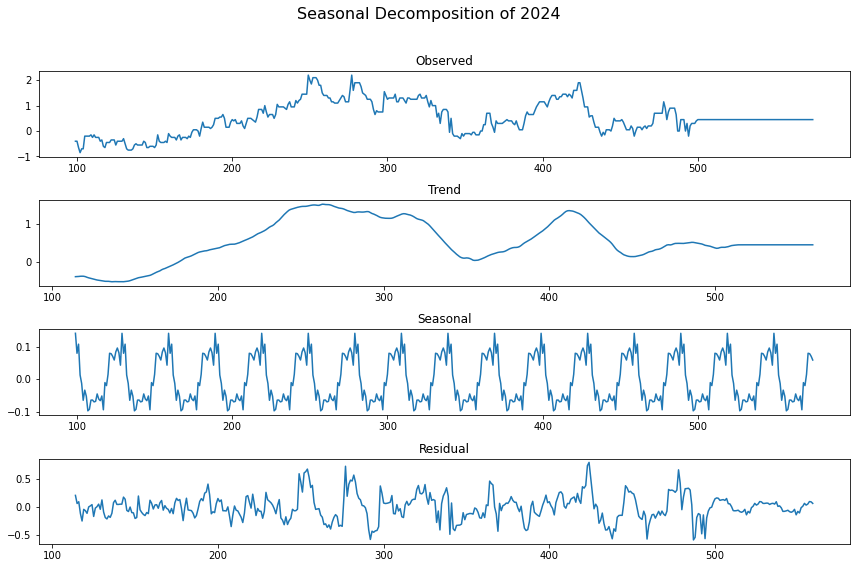

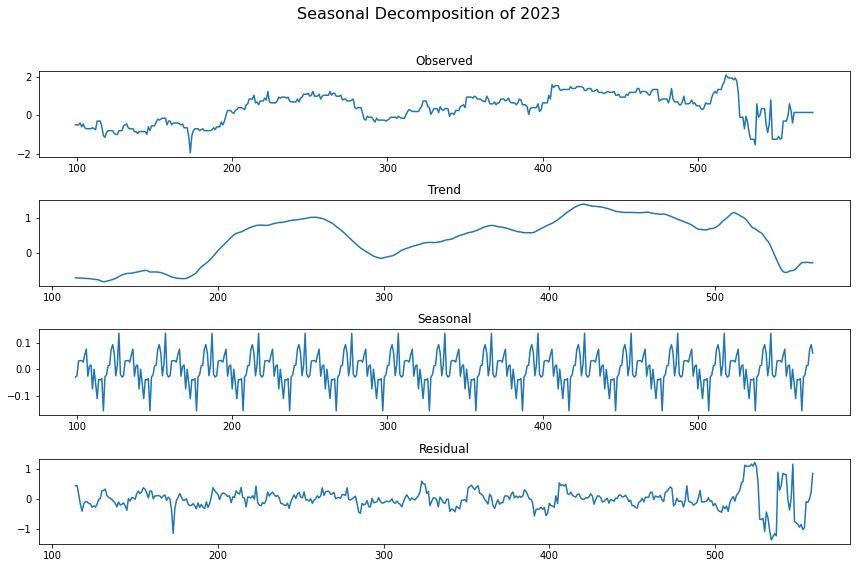

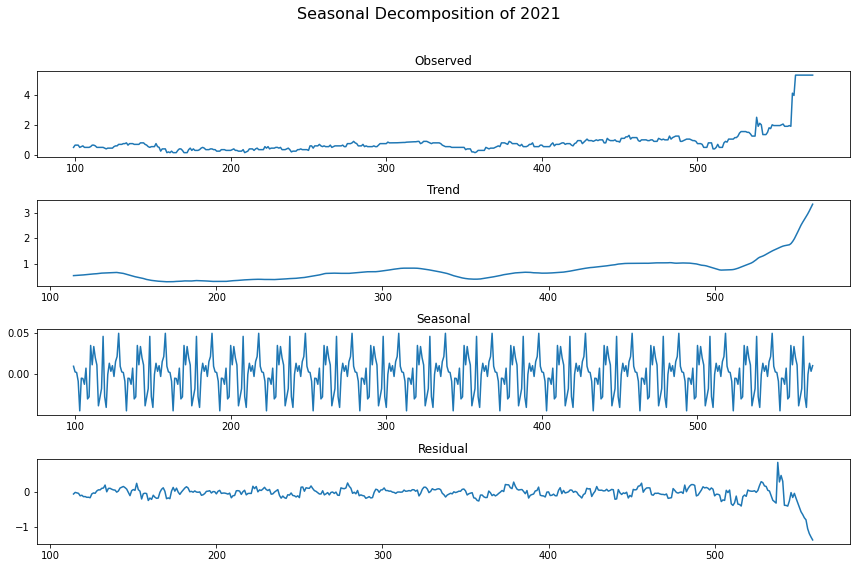

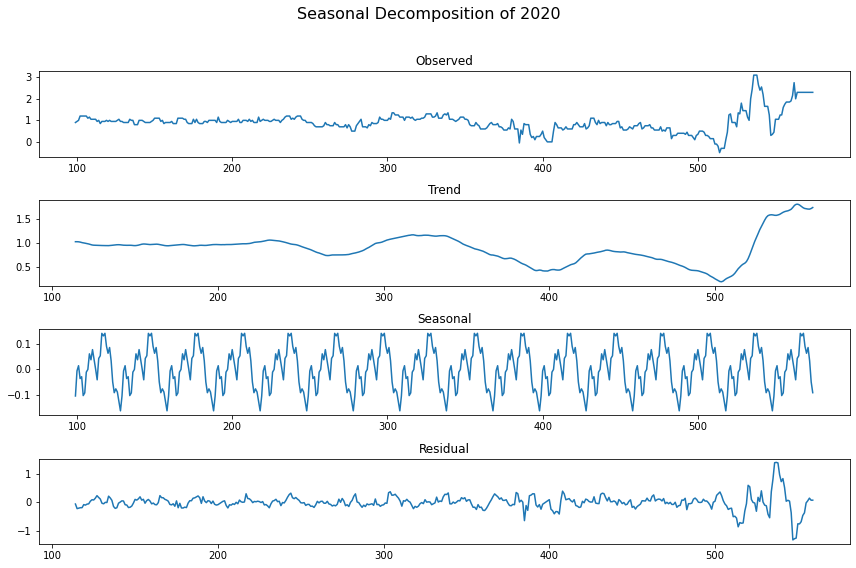

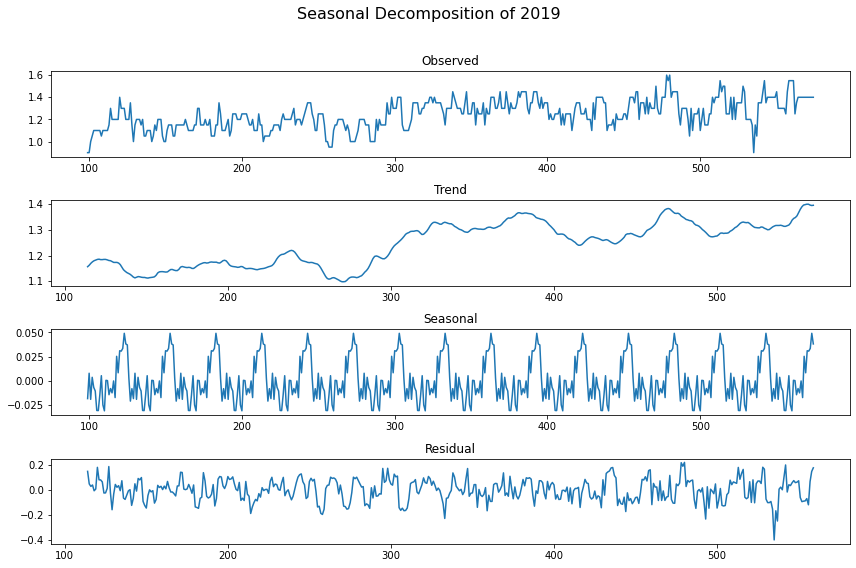

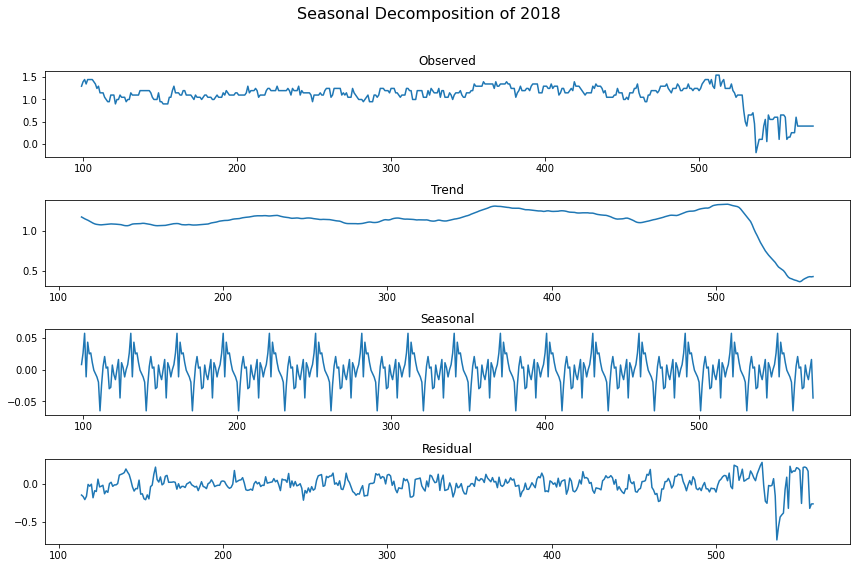

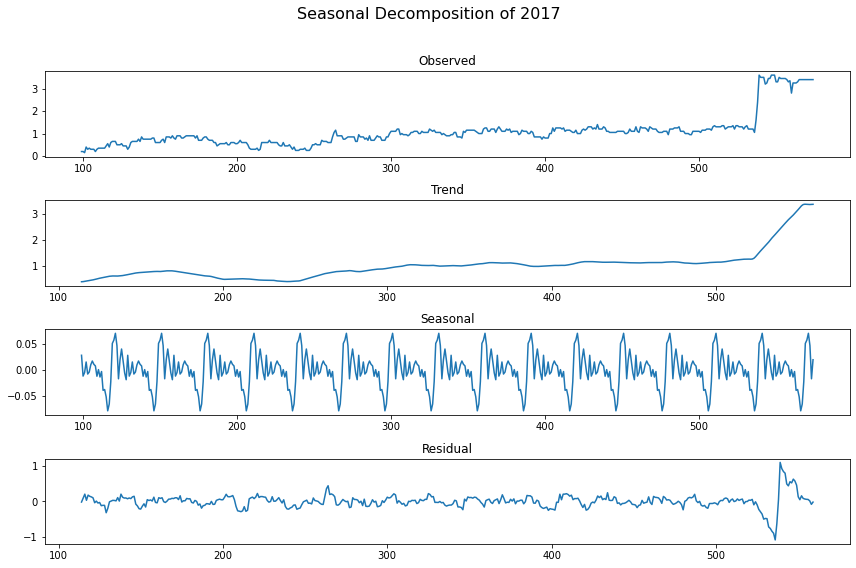

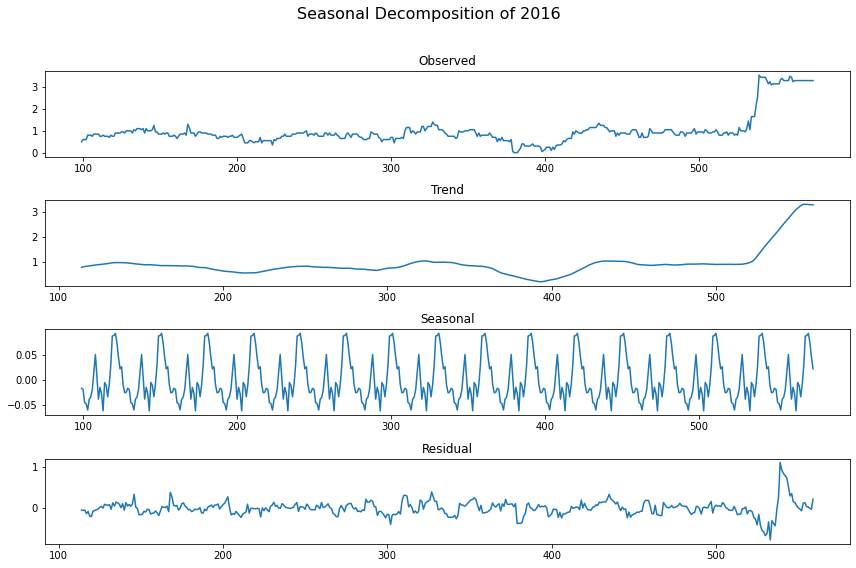

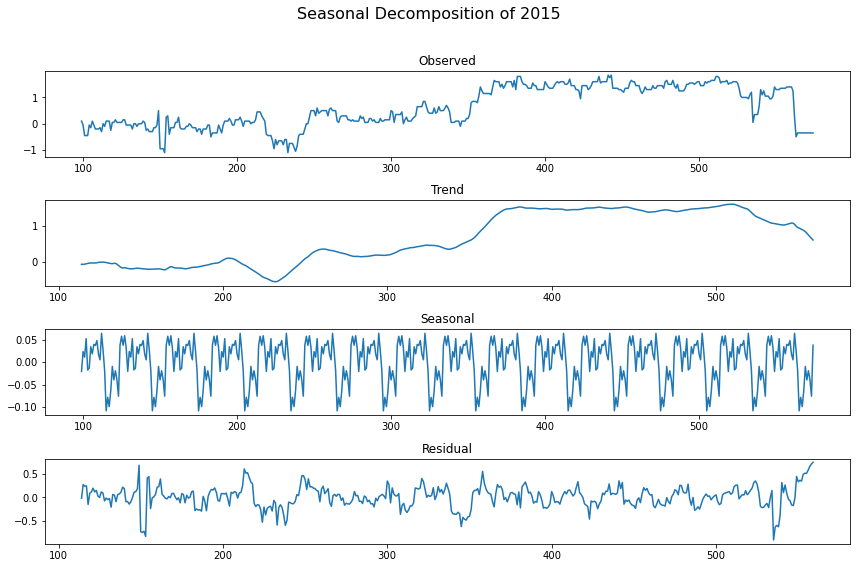

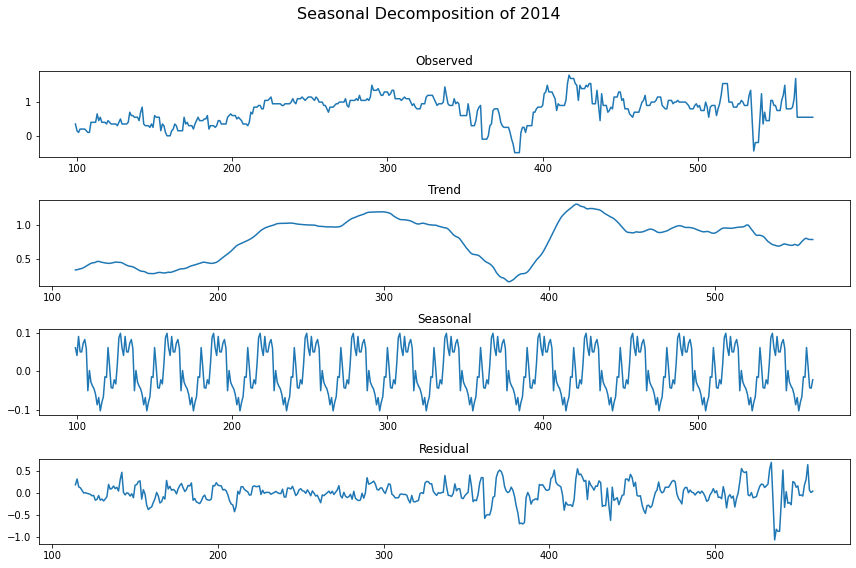

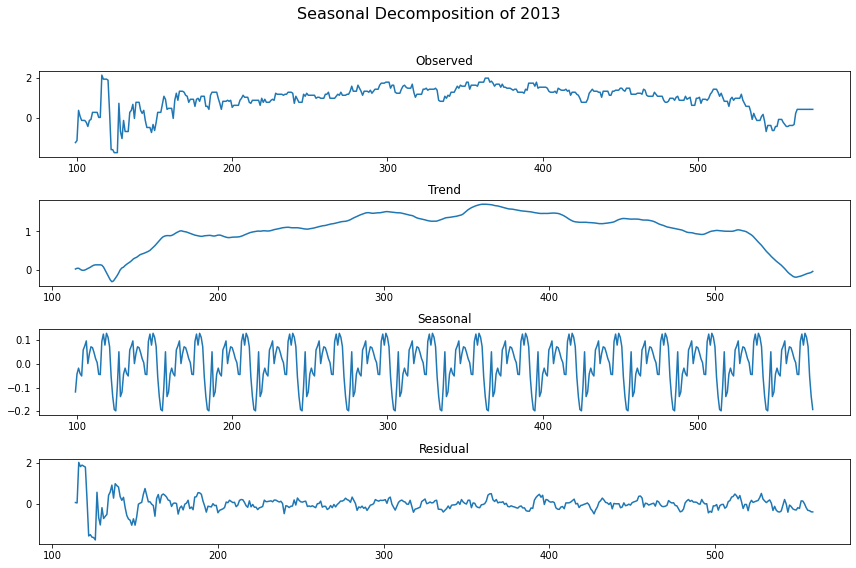

ValueError: could not convert string to float: '2023-06-11'

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# Function to decompose and plot seasonal decomposition for a given year
def decompose_and_plot(series, year):
    result = seasonal_decompose(series, model='additive', period=30)
    
    plt.figure(figsize=(12, 8))
    plt.suptitle(f'Seasonal Decomposition of {year}', fontsize=16)

    plt.subplot(411)
    plt.plot(result.observed)
    plt.title('Observed')

    plt.subplot(412)
    plt.plot(result.trend)
    plt.title('Trend')

    plt.subplot(413)
    plt.plot(result.seasonal)
    plt.title('Seasonal')

    plt.subplot(414)
    plt.plot(result.resid)
    plt.title('Residual')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Decompose and plot for each year
for year in df.columns:
    decompose_and_plot(df[year], year)